In [4]:
from matplotlib.pyplot import *
from prospectorFunctions import *
import time
import itertools
# imports getModel, getSps, getObs, getTheta, getModelPlot

# Importing functions to generate a single model

In [5]:
# Setting the dictionary of parameters to go into getModel, getSps, and getObs

# mass, zred, tage = 1e8, 1.0, 13. (default values used in getModel)

run_params = {'mass':1e7,
              'zred':1.0,
              'tage':12.,
              'snr':10.0,
              'ldist':10.0,
              'fixed_metallicity':None,
              'add_duste':True,
              'zcontinuous':1,
              'obj':[-11.36,  -11.36, -11.65, -12.15, -12.38, -12.43, -12.66, -11.53, -11.21, -10.79, -10.82],
              }
              # The observations specified in `obj` above are object specific

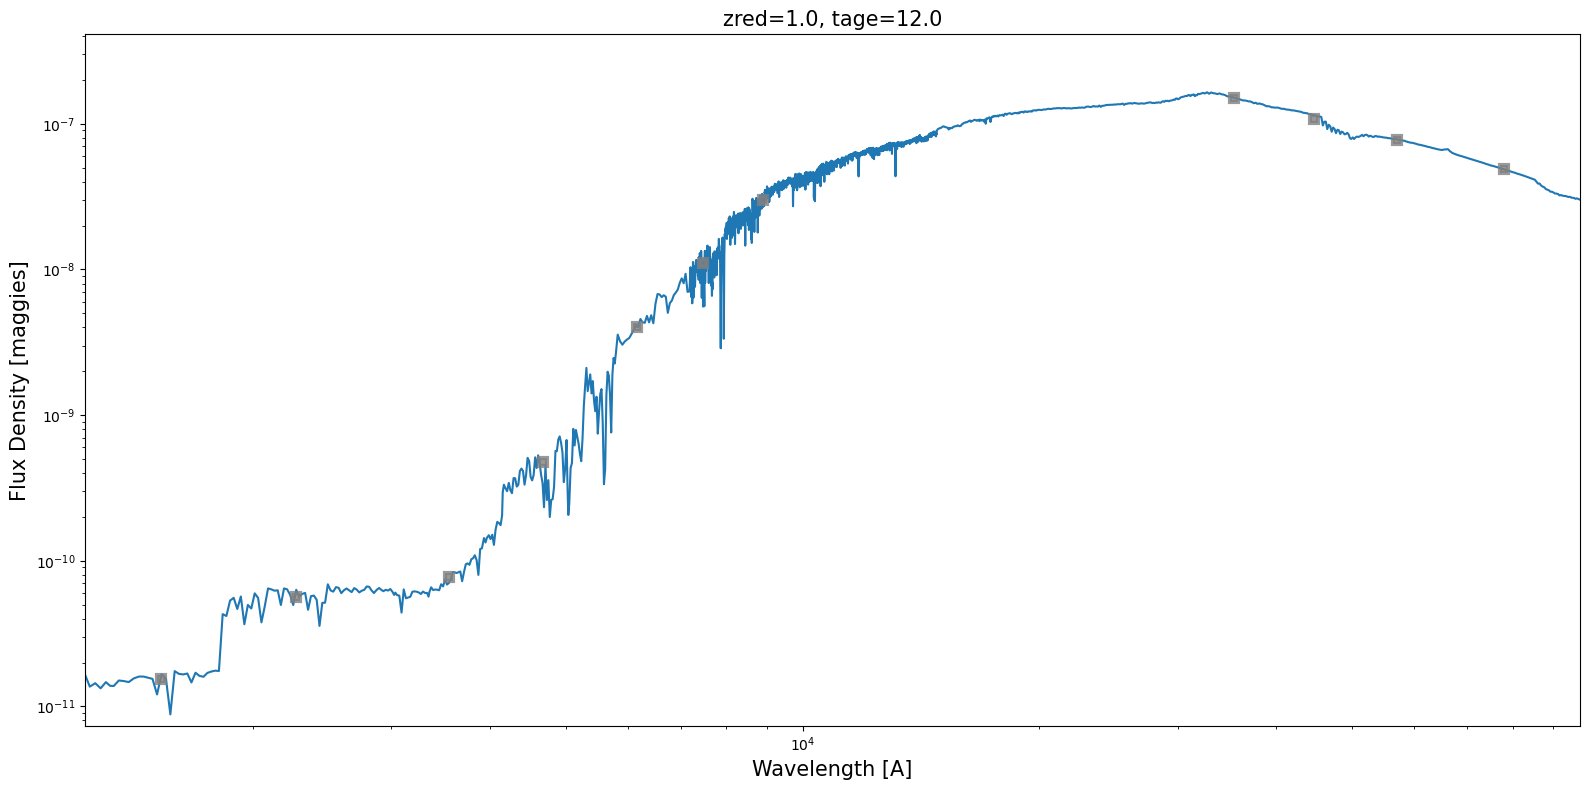

This cell took 50.225441455841064 seconds to run


In [6]:
# Running the parameters through the functions to generate the model

start = time.time()

sps = getSps(**run_params)
obs = getObs(**run_params)
model = getModel(**run_params)
init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)
getModelPlot(model,obs,sps,init_spec,init_phot)

end = time.time()
print(f'\nThis cell ran for {round(end-start)}s.')



-----------------



# Generate data grids for all models in the parameter space

### Need to change the getModel function so that:
- you can tell the function (by providing a dictionary):
    - the range of masses you want to generate through
    - what range of redshifts
    - what range of ages of the galaxy... 
- and the number of models you want to generate for each parameter.

In [ ]:
start = time.time()

ages = [12.,13.,14.]    # [1e6,1e7,1e8]     <- Initital ranges ralf picked
masses = [1e7,1e8]       # [1e6,1e8,1e10]       |
redshifts = [0,1,2]  # [0,1,2,3,4]              V

sps = getSps(**run_params)
obs = getObs(**run_params)

checkpoint = time.time()

#data_grid_model = np.empty((len(ages),len(masses),len(redshifts),1))
#print(data_grid_model.shape)

data_grid_spec = np.empty((len(ages),len(masses),len(redshifts),sps.wavelengths.shape[0]))
print(data_grid_spec.shape)

data_grid_phot = np.empty((len(ages),len(masses),len(redshifts),len(obs['phot_wave'])))
print(data_grid_phot.shape)

for i_age,i_mass,i_redshift in itertools.product(range(len(ages)), range(len(masses)), range(len(redshifts))):
    age = ages[i_age]
    mass = masses[i_mass]
    redshift = redshifts[i_redshift]
    
    run_params['mass'] = mass
    run_params['zred'] = redshift
    run_params['tage'] = age
    
    model = getModel(**run_params)
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)
    
    data_grid_model[i_age, i_mass, i_redshift, :] = model
    data_grid_spec[i_age, i_mass, i_redshift, :] = init_spec
    data_grid_phot[i_age, i_mass, i_redshift, :] = init_phot
    
end = time.time()

In [ ]:
data_grid_phot.shape

In [ ]:
getModelPlot(model, obs, sps, data_grid_spec[2,1,2,:], data_grid_phot[2,1,2,:])

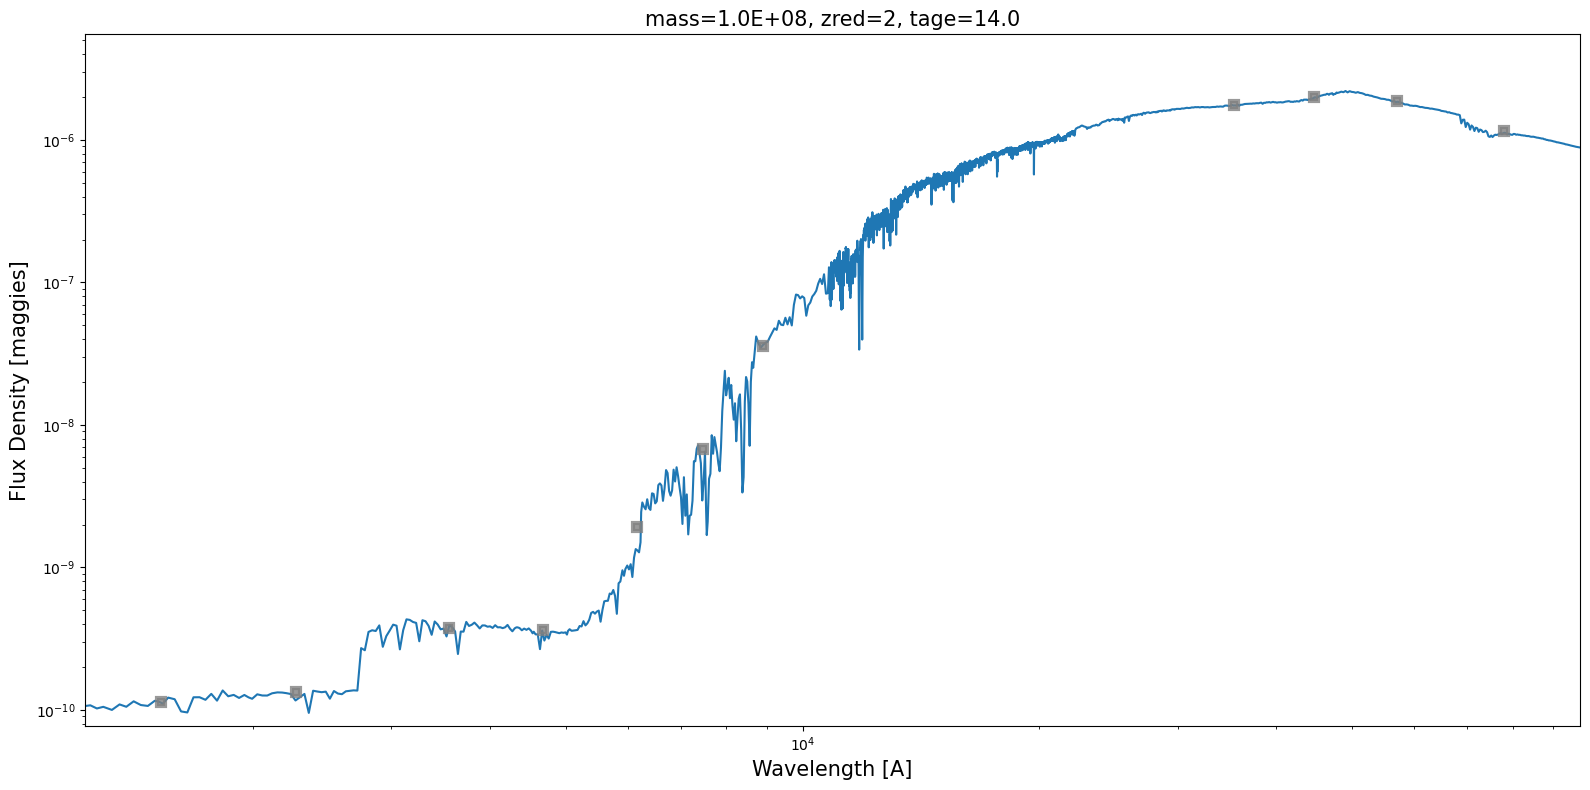

In [62]:
# Whhaaaattt ??

getModelPlot(model, obs, sps, data_grid_spec[2,1,2,:], data_grid_phot[2,1,2,:])